In [5]:
import numpy as np
import matplotlib.pyplot as plt



Part a

Step 10, dt=2.56e-05, Error Estimate=3.333333333333333e-22
Step 20, dt=0.0262144, Error Estimate=5.78141719324102e-13
Step 30, dt=0.04287727662298124, Error Estimate=4.180628520254776e-09
Step 40, dt=0.011501474249141663, Error Estimate=1.121379110738648e-09
Step 50, dt=0.003345352458992086, Error Estimate=3.2724062440595295e-10
Step 60, dt=0.001067942632376079, Error Estimate=1.0481268183863187e-10
Step 70, dt=0.00037187526894870676, Error Estimate=3.6599954306727264e-11
Step 80, dt=0.00013987874594487853, Error Estimate=1.379829791461134e-11
Step 90, dt=5.629837925989276e-05, Error Estimate=5.563809832353518e-12
Step 100, dt=2.404496903520068e-05, Error Estimate=2.3798791761801384e-12
Step 110, dt=1.0821103999928912e-05, Error Estimate=1.0723601782390099e-12
Step 120, dt=5.100947038782391e-06, Error Estimate=5.060197075757827e-13
Step 130, dt=2.505965444192887e-06, Error Estimate=2.4880971286172477e-13
Step 140, dt=1.2775759865554694e-06, Error Estimate=1.269396037692241e-13
Step 150

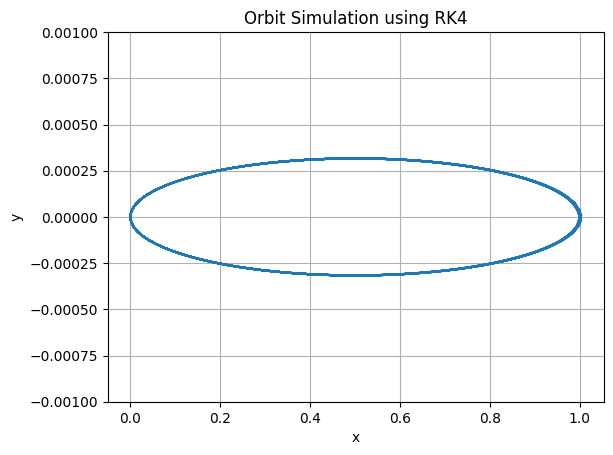

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 4.47213595e-11 0.00000000e+00]
 [1.00000000e+00 1.34164079e-10 0.00000000e+00]
 ...
 [3.64751852e-04 1.20783825e-05 0.00000000e+00]
 [3.52385807e-04 1.18720032e-05 0.00000000e+00]
 [3.40489456e-04 1.16700138e-05 0.00000000e+00]]


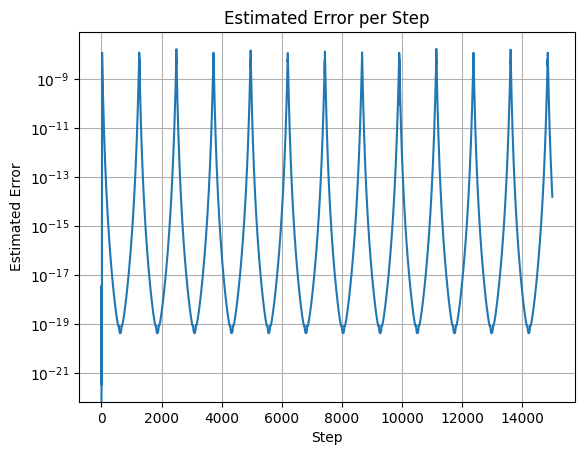

9.999999508266311e-08


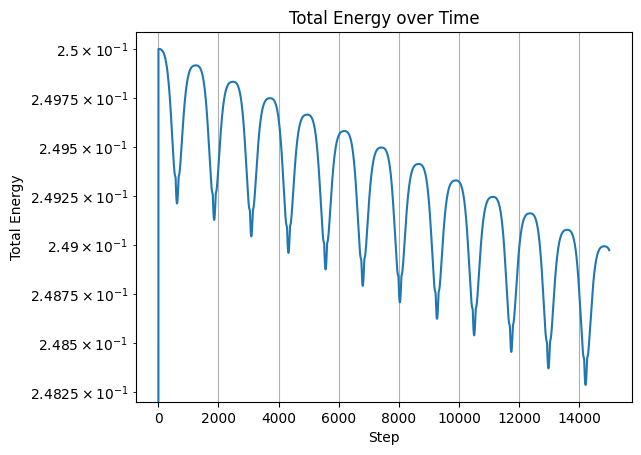

In [16]:
v_0 = np.sqrt(5) * 1e-4

def acceleration(r,):
    norm = np.linalg.norm(r)
    if norm < 1e-10:  # Add a small threshold to prevent division by zero
        return np.zeros_like(r)
    return -1/norm**3 * np.array(r) / 4
def vel_dispersion(v, A=1, B=1):
    return -A/(np.linalg.norm(v)**3 + B) * np.array(v)

def rk4_step(r, v, dt, alpha_dispersion=0, A=1, B=1):
    k1_v = acceleration(r) + alpha_dispersion * vel_dispersion(v, A, B)
    k1_r = v

    k2_v = acceleration(r + 0.5 * dt * k1_r) + alpha_dispersion * vel_dispersion(v + 0.5 * dt * k1_v, A, B)
    k2_r = v + 0.5 * dt * k1_v

    k3_v = acceleration(r + 0.5 * dt * k2_r) + alpha_dispersion * vel_dispersion(v + 0.5 * dt * k2_v, A, B)
    k3_r = v + 0.5 * dt * k2_v

    k4_v = acceleration(r + dt * k3_r) + alpha_dispersion * vel_dispersion(v + dt * k3_v, A, B)
    k4_r = v + dt * k3_v

    r_next = r + (dt / 6) * (k1_r + 2 * k2_r + 2 * k3_r + k4_r)
    v_next = v + (dt / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)

    return r_next, v_next
def simulate_orbit(r0, v0, dt, tf, tol=1e-7, alpha_dispersion=0, A=1, B=1):
    num_steps = int(tf / dt)
    r = np.zeros((num_steps//2, 3))
    v = np.zeros((num_steps//2, 3))
    err = np.zeros(num_steps//2)
    energy = np.zeros(num_steps//2)
    r[0] = r0
    v[0] = v0

    i = 1
    while i < num_steps//2:
        r1, v1 = rk4_step(r[i-1], v[i-1], dt, alpha_dispersion, A=A, B=B)
        r1, v1 = rk4_step(r1, v1, dt, alpha_dispersion, A=A, B=B)
        r2, v2 = rk4_step(r[i-1], v[i-1], 2*dt, alpha_dispersion, A=A, B=B)
        norm = np.linalg.norm(r2-r1)
        if norm < 1e-20:  # Add a small threshold to prevent division by zero
            norm = 1e-20
        rho = 30 * dt * tol / norm
        if rho >= 1:
            r[i] = r1
            v[i] = v1
            err[i] = norm/30
            energy[i] = 0.5 * np.linalg.norm(v[i])**2 - 1/(4 * np.linalg.norm(r[i]))
            i += 1
            if i % 10 == 0:
                print(f"Step {i}, dt={dt}, Error Estimate={err[i-1]}")

        dt = min(dt * rho**(1/4), 2 * dt)

    return r, v, err, energy

r, v, err, energy = simulate_orbit(np.array([1, 0, 0]), np.array([0, v_0, 0]), 1e-7, 3e-3, alpha_dispersion=0)
plt.plot(r[:, 0], r[:, 1])
plt.ylim(-1e-3, 1e-3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit Simulation using RK4')
# plt.axis('equal')
plt.grid()
plt.show()
print(r)


plt.plot(err)
plt.yscale('log')   
plt.xlabel('Step')
plt.ylabel('Estimated Error')
plt.title('Estimated Error per Step')
plt.grid()
plt.show()

print(min([np.linalg.norm(r[i,:]) for i in range(r.shape[0])]))

plt.plot(abs(energy))
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Total Energy')
plt.title('Total Energy over Time')
plt.grid()
plt.show()




Step 10, dt=2.56e-05, Error Estimate=3.333333333333333e-22
Step 20, dt=0.0262144, Error Estimate=3.824171061282385e-12
Step 30, dt=0.06806889917301506, Error Estimate=6.680520306296958e-09
Step 40, dt=0.02139993576542843, Error Estimate=2.1107169550471577e-09
Step 50, dt=0.009786217979143077, Error Estimate=9.779267638226709e-10
Step 60, dt=0.004542656384687634, Error Estimate=4.5398032838735457e-10
Step 70, dt=0.007289847731435659, Error Estimate=3.075438288463034e-10
Step 80, dt=0.013118862956074052, Error Estimate=9.761199137860069e-10
Step 90, dt=0.0288551217314423, Error Estimate=2.1134850705727465e-09
Step 100, dt=0.027247405493496614, Error Estimate=2.690551110623793e-09
Step 110, dt=0.009158417550980198, Error Estimate=9.042879168059007e-10
Step 120, dt=0.004008650668647598, Error Estimate=3.9915410694836127e-10
Step 130, dt=0.0019033849230100579, Error Estimate=1.8950192759026965e-10
Step 140, dt=0.0020793606575920096, Error Estimate=1.482749708035193e-10
Step 150, dt=0.004130

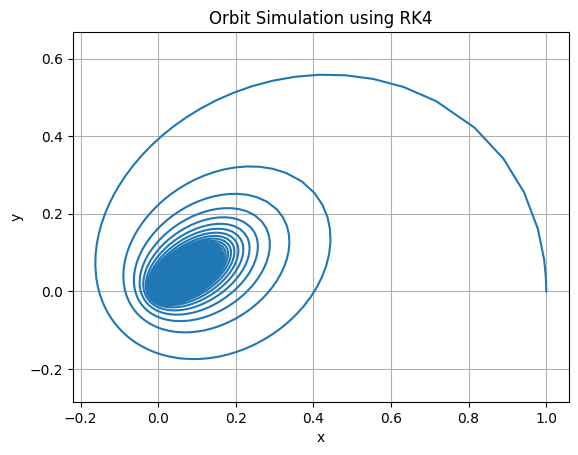

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  7.99999987e-08  0.00000000e+00]
 [ 1.00000000e+00  2.39999988e-07  0.00000000e+00]
 ...
 [ 1.45700927e-04 -1.08765419e-04  0.00000000e+00]
 [ 1.52149332e-04 -1.08898498e-04  0.00000000e+00]
 [ 1.58770815e-04 -1.08969132e-04  0.00000000e+00]]


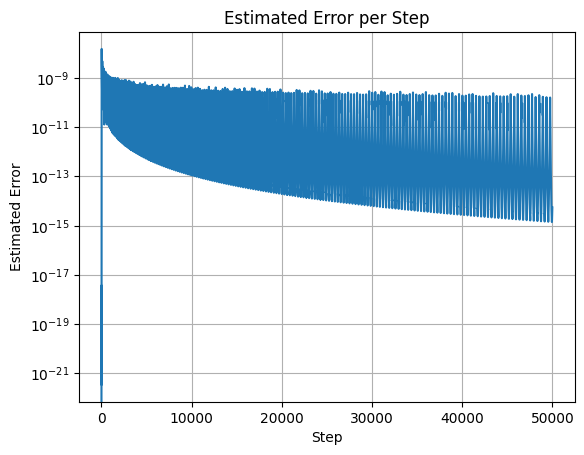

6.051316718167836e-05


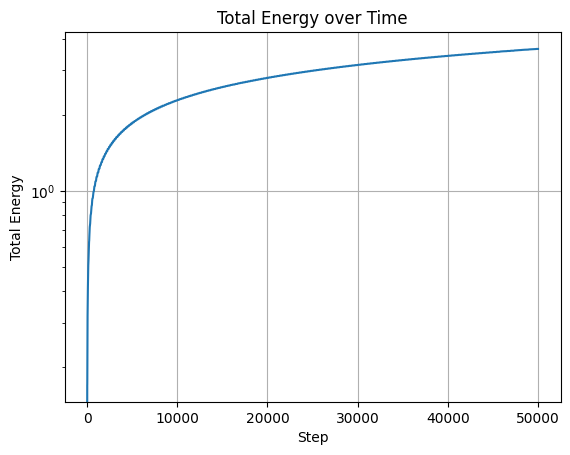

In [17]:
v_0 = .4
r, v, err, energy = simulate_orbit(np.array([1, 0, 0]), np.array([0, v_0, 0]), 1e-7, 1e-2, alpha_dispersion=1, A=.5, B=3)
plt.plot(r[:, 0], r[:, 1])
# plt.ylim(-1e-3, 1e-3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit Simulation using RK4')
plt.axis('equal')
plt.grid()
plt.show()

print(r)


plt.plot(err)
plt.yscale('log')   
plt.xlabel('Step')
plt.ylabel('Estimated Error')
plt.title('Estimated Error per Step')
plt.grid()
plt.show()

print(min([np.linalg.norm(r[i,:]) for i in range(r.shape[0])]))

plt.plot(abs(energy))
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Total Energy')
plt.title('Total Energy over Time')
plt.grid()
plt.show()

In [14]:
def time_to_schwarzschild(r0, v0, dt, tf, tol=1e-7, alpha_dispersion=0):
    num_steps = int(tf / dt)
    r = np.zeros((num_steps//2, 3))
    v = np.zeros((num_steps//2, 3))
    err = np.zeros(num_steps//2)
    energy = np.zeros(num_steps//2)
    r[0] = r0
    v[0] = v0

    t = 0
    i = 1
    while i < num_steps//2:
        r1, v1 = rk4_step(r[i-1], v[i-1], dt, alpha_dispersion)
        r1, v1 = rk4_step(r1, v1, dt, alpha_dispersion)
        r2, v2 = rk4_step(r[i-1], v[i-1], 2*dt, alpha_dispersion)
        norm = np.linalg.norm(r2-r1)
        if norm == 0:  # Add a small threshold to prevent division by zero
            norm = 1e-25
        rho = 30 * dt * tol / norm
        if rho >= 1:
            t += 2 * dt
            r[i] = r1
            v[i] = v1
            err[i] = norm/30
            energy[i] = 0.5 * np.linalg.norm(v[i])**2 - 1/(4 * np.linalg.norm(r[i]))
            i += 1
            if i % 10 == 0:
                print(f"Step {i}, dt={dt}, Error Estimate={err[i-1]}")

        dt = min(dt * rho**(1/4), 2 * dt)

        if np.linalg.norm(r[i-1]) < 1e-7:
            return t


print(time_to_schwarzschild(np.array([1, 0, 0]), np.array([0, v_0, 0]), 1e-7, 1e-2, alpha_dispersion=1))

Step 10, dt=2.56e-05, Error Estimate=3.333333333333333e-27
Step 20, dt=0.0262144, Error Estimate=4.002514704463768e-11
Step 30, dt=0.10759760741825723, Error Estimate=4.553595749644227e-09
Step 40, dt=0.027670505443884615, Error Estimate=2.715235731271136e-09
Step 50, dt=0.008385558640671866, Error Estimate=8.214388159441371e-10
Step 60, dt=0.002610411610516676, Error Estimate=2.558866010656507e-10
Step 70, dt=0.0008664354673259621, Error Estimate=8.514594969349342e-11
Step 80, dt=0.0003108825280055989, Error Estimate=3.062717905701186e-11
Step 90, dt=0.00012031172843496782, Error Estimate=1.1878987790643578e-11
Step 100, dt=5.000616816094305e-05, Error Estimate=4.94693807879842e-12
Step 110, dt=2.2261277413135502e-05, Error Estimate=2.2060631212777856e-12
Step 120, dt=1.0620973494972437e-05, Error Estimate=1.0542514330737217e-12
Step 130, dt=5.468192695684281e-06, Error Estimate=5.43689192637652e-13
Step 140, dt=3.104686633767889e-06, Error Estimate=3.0929585064536136e-13
Step 150, dt

In [ ]:
import concurrent.futures
import numba

# Progress bar helper: prefer notebook-friendly tqdm, fall back to console tqdm
try:
    from tqdm.notebook import tqdm
except Exception:
    try:
        from tqdm import tqdm
    except Exception:
        # Fallback no-op progress iterator
        def tqdm(it, total=None):
            for x in it:
                yield x


def time_to_schwarzschild(r0, v0, dt, tf, tol=1e-7, alpha_dispersion=0, A=1, B=1):
    num_steps = int(tf / dt)
    r = r0
    v = v0

    t = 0
    i = 0
    while i in range(num_steps//2):
        r1, v1 = rk4_step(r, v, dt, alpha_dispersion, A, B)
        r1, v1 = rk4_step(r1, v1, dt, alpha_dispersion, A, B)
        r2, v2 = rk4_step(r, v, 2*dt, alpha_dispersion, A, B)
        norm = np.linalg.norm(r2-r1)
        if norm == 0:  # Add a small threshold to prevent division by zero
            norm = 1e-25
        rho = 30 * dt * tol / norm
        if rho >= 1:
            t += 2 * dt
            r = r1
            v = v1
            i += 1

        dt = min(dt * rho**(1/4), 2 * dt)

        if np.linalg.norm(r) < 1e-7:
            return t
        
    return tf  # Return maximum time if Schwarzschild radius not reached
        

def process_chunk_worker(chunk, r0, v0, dt, tf, tol, alpha_dispersion, A_values, B_values):
    """
    Worker that evaluates a chunk (list) of (i,j) pairs and returns a list of (i,j,t).
    Chunking reduces task overhead when individual evaluations are fast.
    """
    out = []
    for params in chunk:
        i, j = params
        out.append((i, j, time_to_schwarzschild(r0, v0, dt, tf, tol, alpha_dispersion, A_values[i], B_values[j])))
    return out


# small wrapper for multiprocessing.starmap/imap_unordered compatibility
def _worker_star(args):
    return process_chunk_worker(*args)


def A_B_sweep(r0, v0, dt, tf, tol=1e-7, alpha_dispersion=0, A_values=None, B_values=None, parallel=False, max_workers=None, backend='thread', chunk_size=8, show_progress=True):
    """Sweep over A_values and B_values and return a 2D results array.

    Backends supported:
      - 'thread' : ThreadPoolExecutor (default, notebook-friendly)
      - 'process': ProcessPoolExecutor (concurrent.futures)
      - 'multiprocessing': multiprocessing.Pool (user requested)

    Notes: On Windows / Jupyter, the 'multiprocessing' backend may still fail if the
    notebook environment cannot pickle cell-defined functions. For robust process
    parallelism on Windows prefer running as a standalone .py module.
    """
    # Convert A_values/B_values to numpy arrays if needed.
    if A_values is None:
        A_values = np.array([1.0])
    else:
        A_values = np.array(A_values)
    if B_values is None:
        B_values = np.array([1.0])
    else:
        B_values = np.array(B_values)

    results = np.zeros((len(A_values), len(B_values)))

    if not parallel:
        # Sequential fill (safe, simple)
        for i in range(len(A_values)):
            for j in range(len(B_values)):
                results[i, j] = time_to_schwarzschild(r0, v0, dt, tf, tol, alpha_dispersion, A_values[i], B_values[j])
        return results

    # Parallel path using chunking
    params = [(i, j) for i in range(len(A_values)) for j in range(len(B_values))]

    # Create chunks
    if chunk_size <= 1:
        chunks = [[p] for p in params]
    else:
        chunks = [params[k:k+chunk_size] for k in range(0, len(params), chunk_size)]

    from itertools import repeat

    # THREAD backend (fastest to get working inside notebooks)
    if backend == 'thread':
        Executor = concurrent.futures.ThreadPoolExecutor
        worker = process_chunk_worker
        with Executor(max_workers=max_workers) as exe:
            futures = [exe.submit(worker, chunk, r0, v0, dt, tf, tol, alpha_dispersion, A_values, B_values) for chunk in chunks]
            if show_progress:
                it = concurrent.futures.as_completed(futures)
                for future in tqdm(it, total=len(futures)):
                    chunk_out = future.result()
                    for (i, j, t) in chunk_out:
                        results[i, j] = t
            else:
                for future in concurrent.futures.as_completed(futures):
                    chunk_out = future.result()
                    for (i, j, t) in chunk_out:
                        results[i, j] = t
        return results

    # ProcessPoolExecutor backend
    if backend == 'process':
        Executor = concurrent.futures.ProcessPoolExecutor
        worker = _worker_star  # use star wrapper to pass starmap-like args
        args = [(chunk, r0, v0, dt, tf, tol, alpha_dispersion, A_values, B_values) for chunk in chunks]
        with Executor(max_workers=max_workers) as exe:
            futures = [exe.submit(_worker_star, a) for a in args]
            if show_progress:
                it = concurrent.futures.as_completed(futures)
                for future in tqdm(it, total=len(futures)):
                    chunk_out = future.result()
                    for (i, j, t) in chunk_out:
                        results[i, j] = t
            else:
                for future in concurrent.futures.as_completed(futures):
                    chunk_out = future.result()
                    for (i, j, t) in chunk_out:
                        results[i, j] = t
        return results

    # Multiprocessing.Pool backend (uses imap_unordered for progress)
    if backend == 'multiprocessing':
        import multiprocessing as mp
        args = [(chunk, r0, v0, dt, tf, tol, alpha_dispersion, A_values, B_values) for chunk in chunks]
        # Use imap_unordered to get results as finished and reduce memory pressure
        with mp.Pool(processes=max_workers) as pool:
            it = pool.imap_unordered(_worker_star, args)
            if show_progress:
                for chunk_out in tqdm(it, total=len(args)):
                    for (i, j, t) in chunk_out:
                        results[i, j] = t
            else:
                for chunk_out in it:
                    for (i, j, t) in chunk_out:
                        results[i, j] = t
        return results

    raise ValueError(f"Unknown backend '{backend}'. Choose 'thread', 'process' or 'multiprocessing'.")


if __name__ == "__main__":
    # Generate 2D heatmap of time to schwarzschild vs A and B
    A_values = np.linspace(0.5, 10, 20)  # Increased resolution
    B_values = np.linspace(0.5, 10, 20)   # Adjusted range and increased resolution

    print("Starting parameter sweep...")
    # Example: use multiprocessing Pool (may need module/script on Windows)
    results = A_B_sweep(np.array([1, 0, 0]), np.array([0, v_0, 0]), 
                    dt=1e-7, tf=1e-3, alpha_dispersion=1, 
                    A_values=A_values, B_values=B_values, parallel=True, max_workers=None, backend='multiprocessing', chunk_size=8, show_progress=True)
    print("Parameter sweep complete!")

    # Create the heatmap with improved visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(results, extent=(B_values[0], B_values[-1], 
                            A_values[0], A_values[-1]), 
            aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(label='Time to Schwarzschild Radius (Myr)')
    plt.xlabel('log₁₀(B)')
    plt.ylabel('A')
    plt.title('Time to Reach Schwarzschild Radius')

    # Add grid lines
    plt.grid(True, which='both', color='white', linestyle='-', alpha=0.2)
    plt.show()

    # Print some statistics
    print(f"Minimum time: {np.min(results):.2f} Myr")
    print(f"Maximum time: {np.max(results):.2f} Myr")
    print(f"Mean time: {np.mean(results):.2f} Myr")

Starting parameter sweep...


In [10]:
# Quick timing sweep (tiny grid) to compare chunk_size and max_workers
import time

print("Running micro-benchmark with 3x3 grid...")
A_micro = np.linspace(0.5, 10, 3)  # Tiny grid for quick timing
B_micro = np.linspace(0.5, 10, 3)
configs = [
    {'chunk_size':1, 'max_workers':4},    # baseline: no chunking, max threads
    {'chunk_size':3, 'max_workers':4},    # medium chunks
    {'chunk_size':9, 'max_workers':4},    # one chunk per worker
    {'chunk_size':3, 'max_workers':2},    # fewer workers
]

timings = []
print('Testing configs on 3x3 grid (9 tasks total)')
for cfg in configs:
    print(f"\nConfig: chunk_size={cfg['chunk_size']}, max_workers={cfg['max_workers']}")
    t0 = time.time()
    res = A_B_sweep(np.array([1,0,0]), np.array([0, v_0, 0]), dt=1e-7, tf=1e-3, alpha_dispersion=1,
                    A_values=A_micro, B_values=B_micro, parallel=True, 
                    max_workers=cfg['max_workers'], backend='thread', chunk_size=cfg['chunk_size'], show_progress=False)
    dt = time.time() - t0
    timings.append((cfg['chunk_size'], cfg['max_workers'], dt))
    print(f"Elapsed: {dt:.2f} s")

print('\nSummary (sorted by speed):')
for c,m,t in sorted(timings, key=lambda x: x[2]):
    print(f"chunk={c:2d}, workers={m:2d} -> {t:.2f} s")

Running micro-benchmark with 3x3 grid...
Testing configs on 3x3 grid (9 tasks total)

Config: chunk_size=1, max_workers=4
Elapsed: 23.70 s

Config: chunk_size=3, max_workers=4
Elapsed: 23.70 s

Config: chunk_size=3, max_workers=4
Elapsed: 57.20 s

Config: chunk_size=9, max_workers=4
Elapsed: 57.20 s

Config: chunk_size=9, max_workers=4
Elapsed: 23.98 s

Config: chunk_size=3, max_workers=2
Elapsed: 23.98 s

Config: chunk_size=3, max_workers=2
Elapsed: 11.82 s

Summary (sorted by speed):
chunk= 3, workers= 2 -> 11.82 s
chunk= 1, workers= 4 -> 23.70 s
chunk= 9, workers= 4 -> 23.98 s
chunk= 3, workers= 4 -> 57.20 s
Elapsed: 11.82 s

Summary (sorted by speed):
chunk= 3, workers= 2 -> 11.82 s
chunk= 1, workers= 4 -> 23.70 s
chunk= 9, workers= 4 -> 23.98 s
chunk= 3, workers= 4 -> 57.20 s


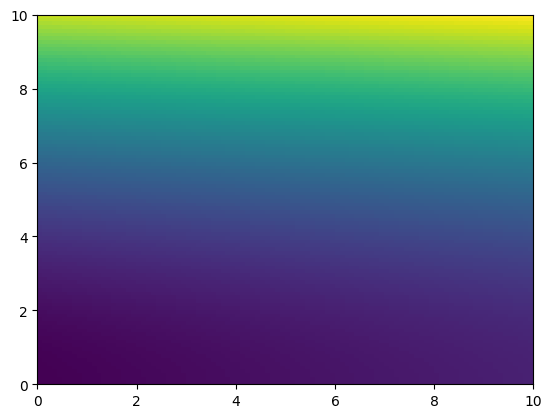

In [25]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)

results = (x[:, None]**2 + y[None, :])
plt.imshow(results, extent=(0,10,0,10), aspect='auto', origin='lower', cmap='viridis')